In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.backend import resize_images
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

### Load data

In [3]:
features = np.load('features_facenet.npy')
labels = np.load('../data/labels.npy')

In [4]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

### Define model

In [5]:
#
model=Sequential()
model.add(Dense(units=100,input_dim=features.shape[1],kernel_initializer='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.3))
model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               262300    
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

### Initialize dataset

In [7]:
x_train.shape

(16595, 2622)

In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [9]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100
EPOCHS = 200

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

### Learn model

In [10]:
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=test_dataset
)

Train for 260 steps, validate for 112 steps
Epoch 1/200
260/260 [==============================] - 2s 7ms/step - loss: 1180.7984 - mae: 28.6806 - mse: 1181.8904 - val_loss: 1084.1001 - val_mae: 27.2358 - val_mse: 1088.2323
Epoch 2/200
260/260 [==============================] - 1s 4ms/step - loss: 1026.7568 - mae: 26.3927 - mse: 1026.8845 - val_loss: 944.0343 - val_mae: 25.1051 - val_mse: 947.8721
Epoch 3/200
260/260 [==============================] - 1s 4ms/step - loss: 893.2445 - mae: 24.2850 - mse: 894.4141 - val_loss: 820.2954 - val_mae: 23.0832 - val_mse: 823.8398
Epoch 4/200
260/260 [==============================] - 1s 4ms/step - loss: 776.3389 - mae: 22.2499 - mse: 776.2511 - val_loss: 712.6367 - val_mae: 21.1374 - val_mse: 715.8885
Epoch 5/200
260/260 [==============================] - 1s 4ms/step - loss: 678.0257 - mae: 20.3820 - mse: 678.3663 - val_loss: 621.2715 - val_mae: 19.3251 - val_mse: 624.2322
Epoch 6/200
260/260 [==============================] - 1s 4ms/step - loss: 

260/260 [==============================] - 1s 4ms/step - loss: 96.4542 - mae: 7.3822 - mse: 96.5115 - val_loss: 70.9245 - val_mae: 6.1611 - val_mse: 70.9665
Epoch 49/200
260/260 [==============================] - 1s 4ms/step - loss: 95.6551 - mae: 7.3313 - mse: 95.7561 - val_loss: 69.1380 - val_mae: 6.0358 - val_mse: 69.2769
Epoch 50/200
260/260 [==============================] - 1s 4ms/step - loss: 95.4438 - mae: 7.3371 - mse: 95.3938 - val_loss: 76.1095 - val_mae: 6.3418 - val_mse: 76.2149
Epoch 51/200
260/260 [==============================] - 1s 4ms/step - loss: 93.3245 - mae: 7.2932 - mse: 93.3291 - val_loss: 72.6733 - val_mae: 6.3566 - val_mse: 72.7829
Epoch 52/200
260/260 [==============================] - 1s 4ms/step - loss: 92.7093 - mae: 7.2627 - mse: 92.5788 - val_loss: 70.1769 - val_mae: 6.0986 - val_mse: 70.1670
Epoch 53/200
260/260 [==============================] - 1s 4ms/step - loss: 92.3070 - mae: 7.2496 - mse: 92.3902 - val_loss: 79.2700 - val_mae: 6.5192 - val_mse: 7

260/260 [==============================] - 1s 4ms/step - loss: 76.4246 - mae: 6.5392 - mse: 76.4899 - val_loss: 75.2749 - val_mae: 6.4281 - val_mse: 75.1597
Epoch 97/200
260/260 [==============================] - 1s 4ms/step - loss: 77.6942 - mae: 6.5801 - mse: 77.7014 - val_loss: 65.1683 - val_mae: 5.8666 - val_mse: 65.1066
Epoch 98/200
260/260 [==============================] - 1s 4ms/step - loss: 75.9739 - mae: 6.5108 - mse: 76.0239 - val_loss: 68.3861 - val_mae: 6.2612 - val_mse: 68.4150
Epoch 99/200
260/260 [==============================] - 1s 4ms/step - loss: 75.1010 - mae: 6.4690 - mse: 75.0885 - val_loss: 71.7511 - val_mae: 6.3650 - val_mse: 71.6583
Epoch 100/200
260/260 [==============================] - 1s 4ms/step - loss: 76.4161 - mae: 6.4861 - mse: 76.4900 - val_loss: 64.9901 - val_mae: 5.9681 - val_mse: 64.9822
Epoch 101/200
260/260 [==============================] - 1s 4ms/step - loss: 76.6964 - mae: 6.5387 - mse: 76.7744 - val_loss: 65.8365 - val_mae: 6.0276 - val_mse:

260/260 [==============================] - 1s 4ms/step - loss: 68.2416 - mae: 6.1809 - mse: 68.2811 - val_loss: 63.3589 - val_mae: 5.8335 - val_mse: 63.3555
Epoch 145/200
260/260 [==============================] - 1s 4ms/step - loss: 67.3702 - mae: 6.1571 - mse: 67.4084 - val_loss: 81.0432 - val_mae: 6.8163 - val_mse: 80.8927
Epoch 146/200
260/260 [==============================] - 1s 4ms/step - loss: 68.3536 - mae: 6.1784 - mse: 68.4509 - val_loss: 65.9504 - val_mae: 5.9450 - val_mse: 65.8561
Epoch 147/200
260/260 [==============================] - 1s 4ms/step - loss: 67.8272 - mae: 6.1557 - mse: 67.8804 - val_loss: 66.8045 - val_mae: 6.2279 - val_mse: 66.8050
Epoch 148/200
260/260 [==============================] - 1s 5ms/step - loss: 67.8262 - mae: 6.1360 - mse: 67.8133 - val_loss: 66.7171 - val_mae: 6.1114 - val_mse: 66.7248
Epoch 149/200
260/260 [==============================] - 1s 4ms/step - loss: 66.4203 - mae: 6.0916 - mse: 66.4005 - val_loss: 63.2377 - val_mae: 5.8321 - val_m

Epoch 192/200
260/260 [==============================] - 1s 4ms/step - loss: 62.4821 - mae: 5.8793 - mse: 62.4090 - val_loss: 65.7445 - val_mae: 5.9870 - val_mse: 65.6007
Epoch 193/200
260/260 [==============================] - 1s 4ms/step - loss: 62.7104 - mae: 5.9231 - mse: 62.7518 - val_loss: 78.6235 - val_mae: 6.8229 - val_mse: 78.6950
Epoch 194/200
260/260 [==============================] - 1s 4ms/step - loss: 61.6169 - mae: 5.8841 - mse: 61.6761 - val_loss: 71.2406 - val_mae: 6.5018 - val_mse: 71.2782
Epoch 195/200
260/260 [==============================] - 1s 4ms/step - loss: 62.4008 - mae: 5.9030 - mse: 62.4434 - val_loss: 68.4384 - val_mae: 6.3546 - val_mse: 68.5311
Epoch 196/200
260/260 [==============================] - 1s 6ms/step - loss: 61.2762 - mae: 5.8653 - mse: 61.3563 - val_loss: 63.0867 - val_mae: 5.8645 - val_mse: 63.0682
Epoch 197/200
260/260 [==============================] - 1s 5ms/step - loss: 62.4305 - mae: 5.9114 - mse: 62.4687 - val_loss: 63.1426 - val_mae: 

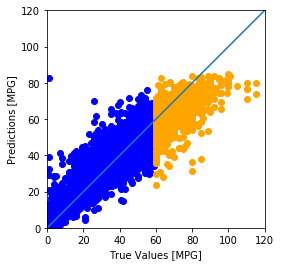

In [11]:
test_predictions = model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test[y_test<60], test_predictions[y_test<60], color='blue')
plt.scatter(y_test[y_test>=60], test_predictions[y_test>=60], color='orange')
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 120]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


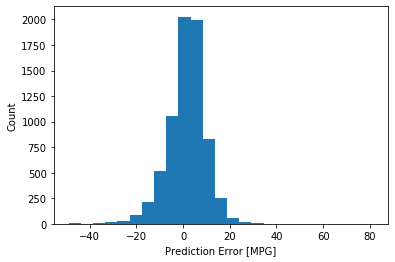

In [12]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

### Error for age > 60

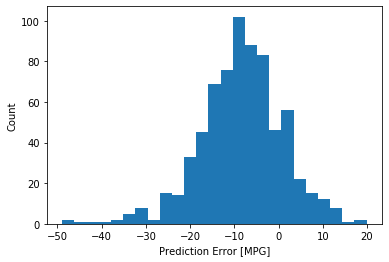

In [13]:
error = test_predictions[y_test > 60] - y_test[y_test > 60]
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [14]:
error.mean()

-8.42810946896315

In [15]:
error.std()

9.434573686395504

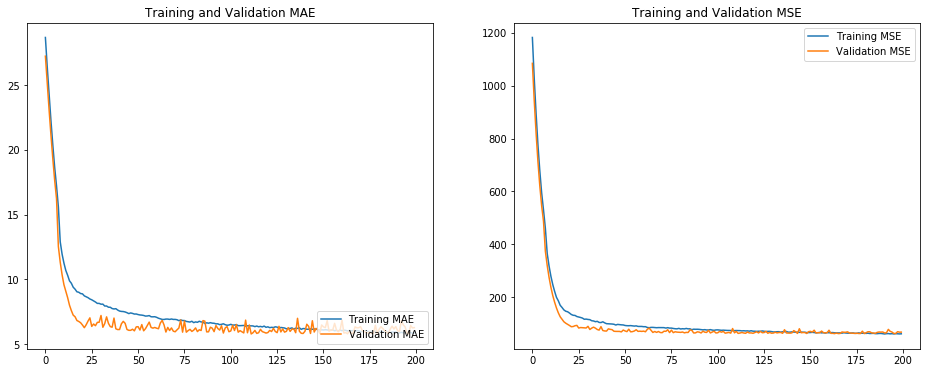

In [16]:
acc = history.history['mae']
val_acc = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training MAE')
plt.plot(epochs_range, val_acc, label='Validation MAE')
plt.legend(loc='lower right')
plt.title('Training and Validation MAE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training MSE')
plt.plot(epochs_range, val_loss, label='Validation MSE')
plt.legend(loc='upper right')
plt.title('Training and Validation MSE')
plt.show()